In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#### Data generation
def generate_data(B = [0, 0, 0, 1], n = 1000):
    
    X1 = np.random.normal(0,1,n)
    X2 = np.random.normal(0,1,n)
    X3 = X1*X2
    
    X = pd.DataFrame(np.transpose([X1, X2]))
    Y =  np.transpose((1/(1+np.exp([B] @ np.array([[1 for i in range(n)], X1, X2, X3]+np.random.normal(0,1/10,n))))>1/2).astype(int))
    return X, Y


In [6]:
class LR():
    def __init__(self, maximisation_minorisation = False):
        self.beta = []
        self.maximisation_minorisation = maximisation_minorisation
        
    def sigmoid(self, X, β):
        return 1/(1+np.exp(X @ β))

    def fit(self, X, Y, iter_max = 100, interactions = [], l2=0): 
        
        # X- DataFrame of predictors
        # Y- matrix of target variable of shape N x 1
        
        # iter_max- maximum number of iterations 
        # interactions- a matrix with two columns, in which each row specifies a pair of variables between which we want to consider interactions
        # l2- ridge regularization strength
        
        X=np.c_[np.ones(X.shape[0]) , X.values]
        self.interactions = interactions
        for interaction in interactions:
            X=np.c_[X, X[:,interaction[0]+1] * X[:,interaction[1]+1]]
        β_new = np.transpose([[np.random.uniform() for _ in range(X.shape[1])]]) #Beta initialisation
        i=0
        
        while i==0 or (i < iter_max and (np.sum(np.abs(β_new-β_old))>1e-4)): #Stopping if betas don't change or reached iteration limit
            i+=1
            β_old = β_new
            π = self.sigmoid(X, β_old)
            W = [1/4 for i in range(X.shape[0])] if self.maximisation_minorisation else np.transpose((π*(1-π)))[0]
            
            #Stopping when W approaches singularity
            if 1-self.maximisation_minorisation and np.min(W)<1e-20: 
                break
            
            W = np.diag(W)
            H = np.transpose(X) @ W @ X
            grad = np.transpose(X) @ (Y-π)
            β_new = β_old - np.linalg.inv(H + l2*np.eye(H.shape[0])) @ grad
        self.beta = β_new
        if i==iter_max:
            print("Algorithm didn't converge! Iteration limit reached!")

    def predict(self, X, p=1/2):
        X_exp = np.c_[np.ones(X.shape[0]) , X.values]
        for interaction in self.interactions:
            X_exp=np.c_[X_exp, X_exp[:,interaction[0]+1] * X_exp[:,interaction[1]+1]]
        return (self.sigmoid(X_exp,self.beta)>p).astype(int)
    


In [14]:
def run_experiment(B = [0, 0, 0, 1], interacions = False):
    X, Y = generate_data(B)

    lr = LR()
    if interacions:
        lr.fit(X,Y, interactions=[[0,1]], l2=0)
    else:
        lr.fit(X,Y, l2=0)

    y_pred =  lr.predict(X)
    plt.scatter(X[0], X[1], c=Y)
    plt.show()

    print(f'Accuracy: {1-np.mean(np.abs(y_pred-Y))}')
    plt.scatter(X[0], X[1], c=y_pred)
    plt.show()



## Data without interactions

### Model without interactions

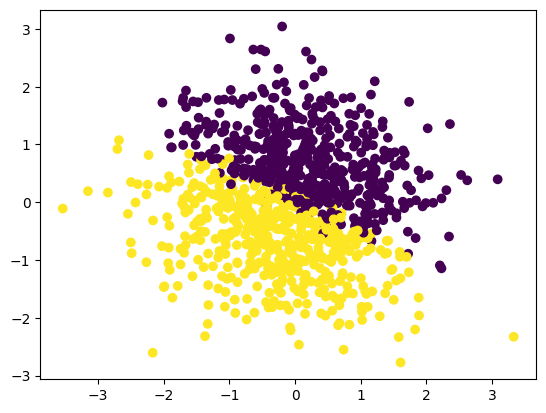

Accuracy: 0.954


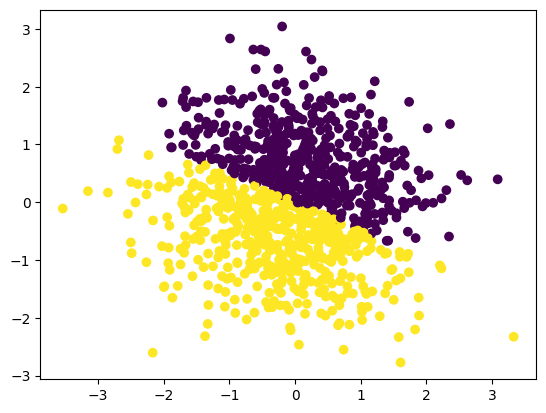

In [15]:
run_experiment(B=[0,1,2,0])

### Model with interactions

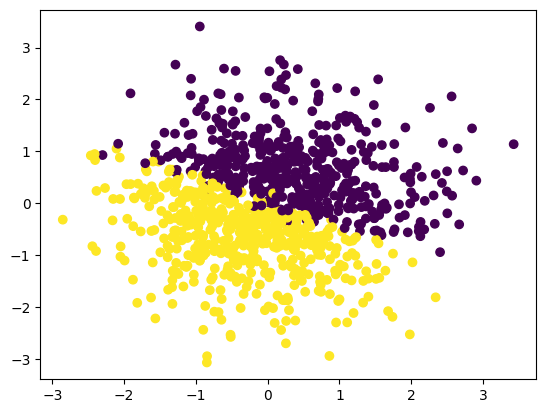

Accuracy: 0.969


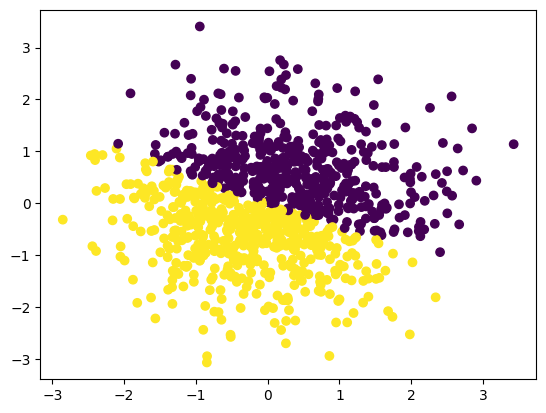

In [17]:
run_experiment(B=[0,1,2,0], interacions = True)

## Data with interactions

### Model without interactions

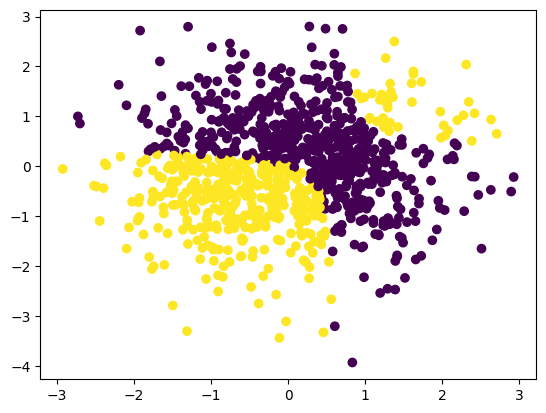

Accuracy: 0.859


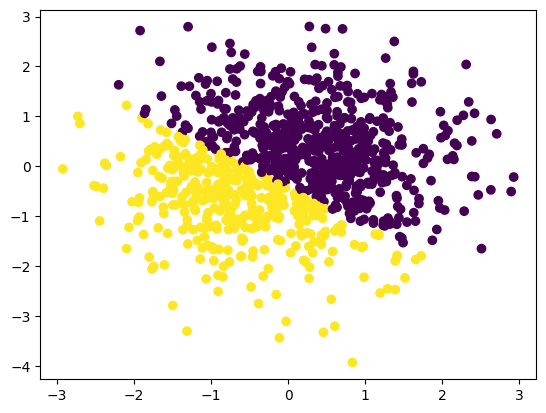

In [20]:
run_experiment(B=[0,1,2,-3])

### Model with interactions

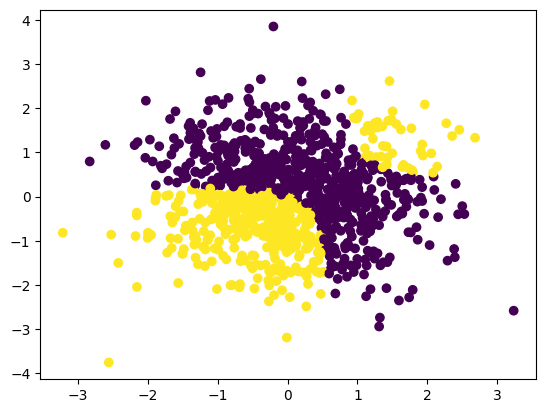

Accuracy: 0.9339999999999999


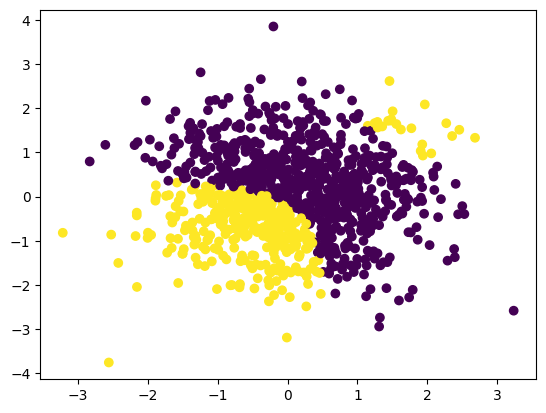

In [21]:
run_experiment(B=[0,1,2,-3], interacions = True)

## XOR problem

### Model without interactions

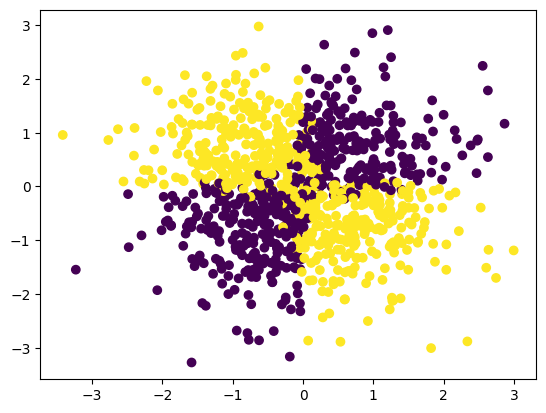

Accuracy: 0.44899999999999995


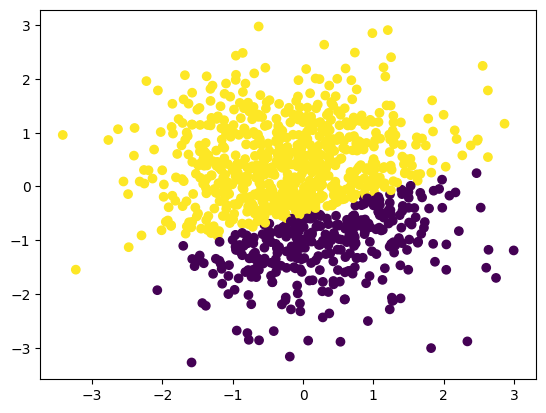

In [22]:
run_experiment(B=[0,0,0,1])

### Model with interactions

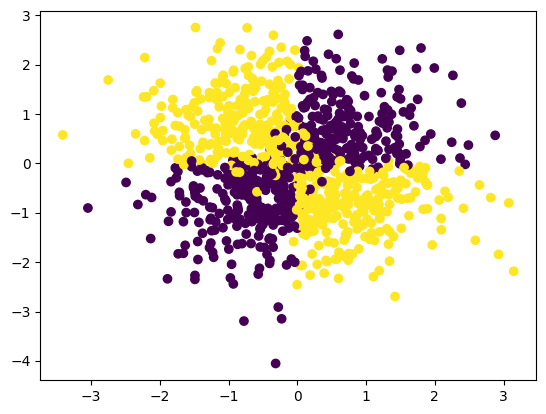

Accuracy: 0.914


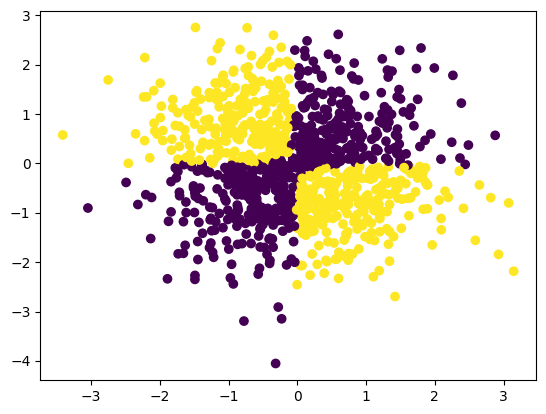

In [23]:
run_experiment(B=[0,0,0,1], interacions = True)